# Stock Price Prediction

In [2]:
#%%
##############################################################################
#====================================SETUP===================================#
##############################################################################

import datetime
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


S1 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/AAPL_5min.txt", sep=",", header=None)
S1 = S1[[0, 4]]
S1[0] = pd.to_datetime(S1[0])
S1['Date'] = S1[0].dt.date
S1['Time'] = S1[0].dt.time

S2 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/CSCO_5min.txt", sep=",", header=None)
S2 = S2[[0, 4]]
S2[0] = pd.to_datetime(S2[0])
S2['Date'] = S2[0].dt.date
S2['Time'] = S2[0].dt.time

S3 = pd.read_csv("G:/UH/S2/MATH6373-Deep Learning and Artificial Neural Networks/HW/hw1.intraday US data/hw1.intraday US data/GE_5min.txt", sep=",", header=None)
S3 = S3[[0, 4]]
S3[0] = pd.to_datetime(S3[0])
S3['Date'] = S3[0].dt.date
S3['Time'] = S3[0].dt.time

stock_names = 'AAPL CSCO GE'.split()

S1["Price"] = S1[4]
S1 = S1[["Date","Time","Price"]]

S2["Price"] = S2[4]
S2 = S2[["Date","Time","Price"]]

S3["Price"] = S3[4]
S3 = S3[["Date","Time","Price"]]



S1 = S1.fillna(S1.mean(numeric_only = True))
S2 = S2.fillna(S2.mean(numeric_only = True))
S3 = S3.fillna(S3.mean(numeric_only = True))

D1 = datetime.date(2018,1,2)
D2 = datetime.date(2023,1,15)
T1 = datetime.time(9,25,0)
T2 = datetime.time(16,0,0)


Date1 = S1[(S1['Date']<D2)&(S1['Date']>D1)]
time1 = Date1[(Date1['Time']<T2)&(Date1["Time"]>T1)]

Date2 = S2[(S2['Date']<D2)&(S2['Date']>D1)]
time2 = Date2[(Date2['Time']<T2)&(Date2["Time"]>T1)]

Date3 = S3[(S3['Date']<D2)&(S3['Date']>D1)]
time3 = Date3[(Date3['Time']<T2)&(Date3["Time"]>T1)]




A1 = pd.pivot_table(time1, index=["Date"],columns = ["Time"])
                    
A2 = pd.pivot_table(time2, index=["Date"],columns = ["Time"])

A3 = pd.pivot_table(time3, index=["Date"],columns = ["Time"])



A1 = A1.fillna(A1.mean(numeric_only = True))
A2 = A2.fillna(A2.mean(numeric_only = True))
A3 = A3.fillna(A3.mean(numeric_only = True))



A1.index = range(1,len(A1)+1)

A2.index = range(1,len(A2)+1)

A3.index = range(1,len(A3)+1)



B1 = A1.iloc[:,-1]

B2 = A2.iloc[:,-1]

B3 = A3.iloc[:,-1]


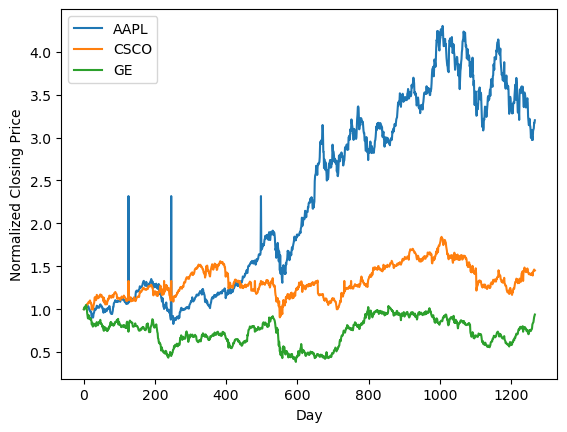

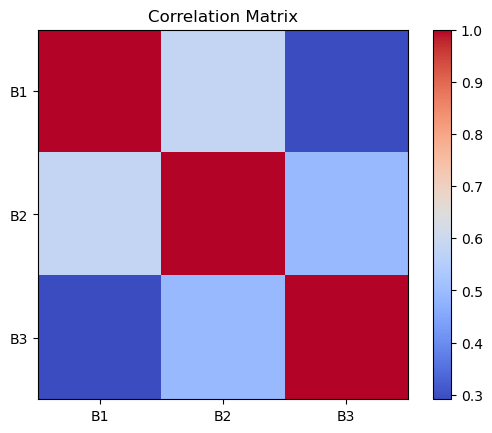

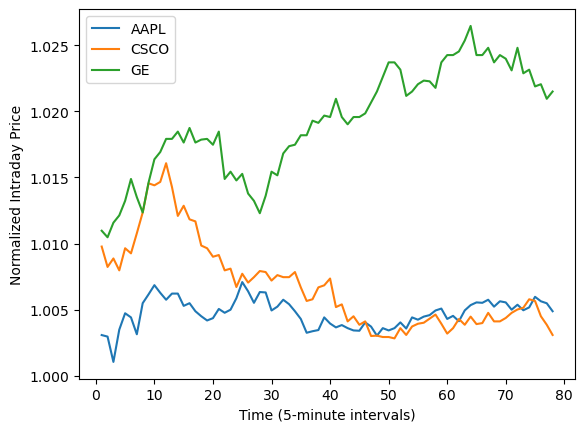

In [3]:
#%%
##############################################################################
#====================================PLOTS===================================#
##############################################################################

A = pd.concat([A1, A2,A3], axis=1)
A.isnull().sum().sum()



closing_prices = pd.concat([B1,B2,B3], axis=1)
normalized_closing_prices = closing_prices.div(closing_prices.iloc[0])


# Plot the normalized closing prices over time
plt.plot(normalized_closing_prices)
plt.xlabel('Day')
plt.ylabel('Normalized Closing Price')
plt.legend(['AAPL', 'CSCO', 'GE'])
plt.show()


# Compute and plot the correlation matrix
corr_matrix = normalized_closing_prices.corr()
plt.imshow(corr_matrix, cmap='coolwarm')
plt.colorbar()
plt.xticks(np.arange(3), ['B1', 'B2', 'B3'])
plt.yticks(np.arange(3), ['B1', 'B2', 'B3'])
plt.title('Correlation Matrix')
plt.show()


# Extract the intraday stock prices for a single day and normalize them
intraday_prices = pd.concat([A1.iloc[1,:], A2.iloc[1,:],A3.iloc[1,:]], axis=1)
normalized_intraday_prices = intraday_prices.div(list(closing_prices.iloc[0]), axis='columns')
normalized_intraday_prices.index = range(1,len(intraday_prices)+1)
# Plot the normalized intraday prices for a single day
plt.plot(normalized_intraday_prices)
plt.xlabel('Time (5-minute intervals)')
plt.ylabel('Normalized Intraday Price')
plt.legend(['AAPL', 'CSCO', 'GE'])
plt.show()

C:\Users\johnn\AppData\Local\Temp\ipykernel_15564\4022705657.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V1.cor = np.corrcoef(V1)
C:\Users\johnn\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 23), 1267)

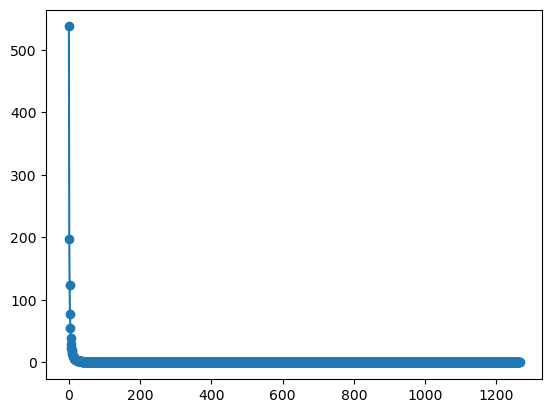

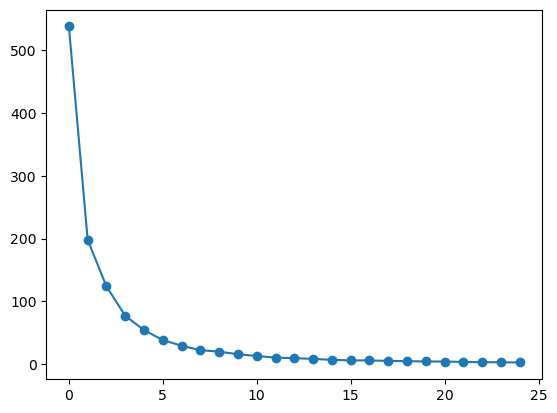

In [4]:
#%%
##############################################################################
#====================================MLP1====================================#
##############################################################################

#------------------------------------PCA-------------------------------------#

V1 = A1.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V1.shape
V1.cor = np.corrcoef(V1)
eigenvalues = np.linalg.eig(V1.cor)
plt.plot(eigenvalues[0],'-o')

plt.figure()
plt.plot(eigenvalues[0][:25],'-o')

pca1 = PCA(n_components=0.95)
U1=pca1.fit_transform(V1)
U1.shape

y1 = B1
y1.shape, U1.shape

N1 = V1.shape[0]
V1.shape, y1.shape, U1.shape, N1



In [5]:
#%%
#---------------------------------MLP SETUP----------------------------------#

x_train1 = list()

for i in range(N1-63):
  vector12 = [U1[i], U1[i+1], U1[i+2]]
  vector12 = np.array(vector12).flatten()
  x_train1.append(vector12)

x_train1 = np.array(x_train1)
x_train1.shape

x_test1 = list()

for i in range(N1-63,N1-3):
  vector12 = [U1[i], U1[i+1], U1[i+2]]
  vector12 = np.array(vector12).flatten()
  x_test1.append(vector12)

x_test1 = np.array(x_test1)
x_test1.shape

y_train1 = y1[3:N1-60]
y_train1.shape

y_test1 = y1[N1-60:]
y_test1.shape

from sklearn.preprocessing import StandardScaler

xscaler = StandardScaler()
x_train1 = xscaler.fit_transform(x_train1)
x_test1 = xscaler.transform(x_test1)



#Finding Hidden Layer Sizes (69 inputs, 1 output)
w = lambda h: 69*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
  h += 1

h,x_train1.shape,x_test1.shape,y_train1.shape,y_test1.shape



C:\Users\johnn\AppData\Local\Temp\ipykernel_15564\690842021.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train1 = y1[3:N1-60]
C:\Users\johnn\AppData\Local\Temp\ipykernel_15564\690842021.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test1 = y1[N1-60:]


(17, (1204, 69), (60, 69), (1204,), (60,))

2/2 [==============================] - 0s 2ms/step


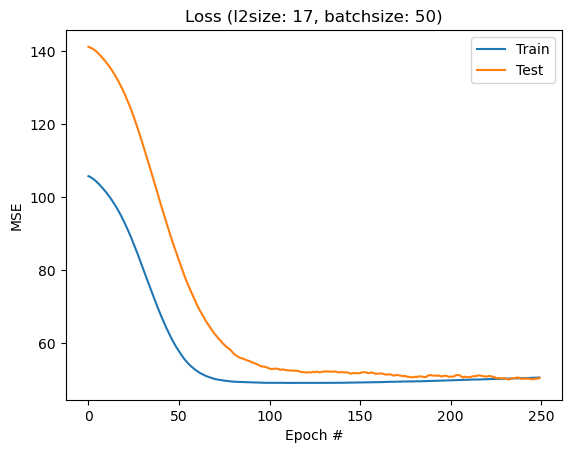

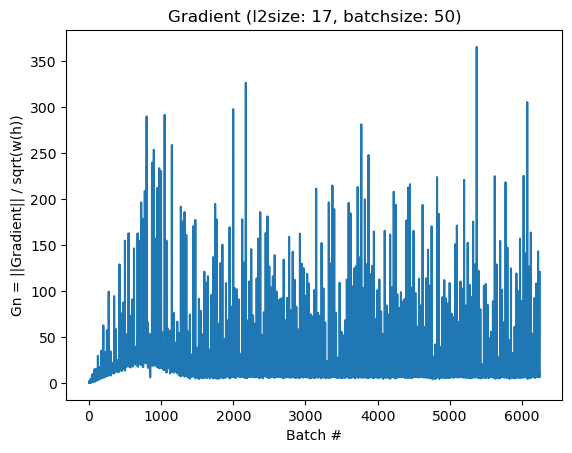

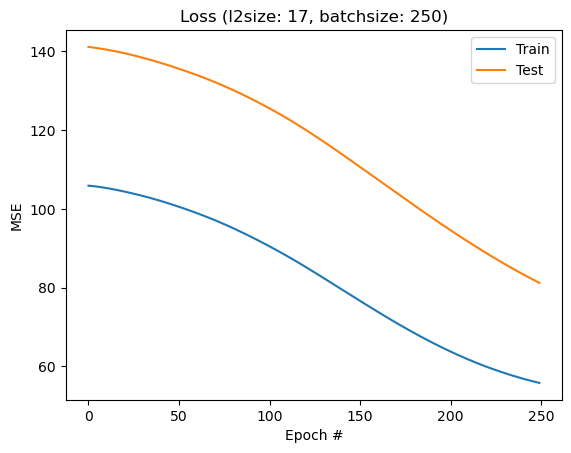

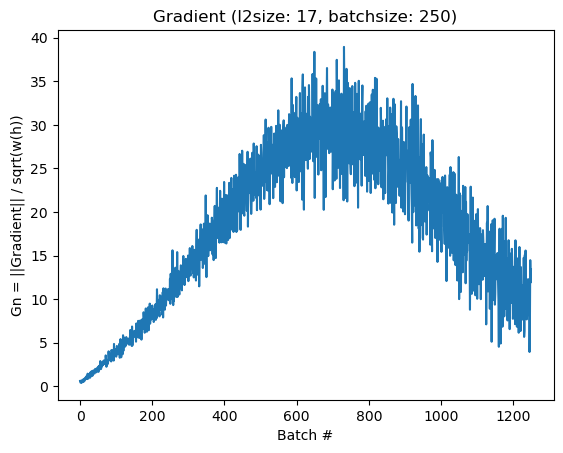

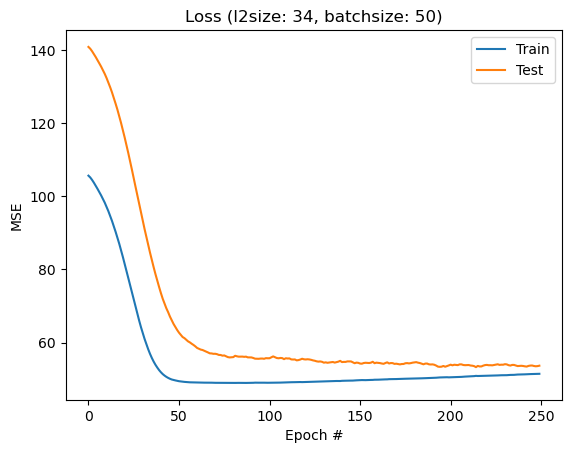

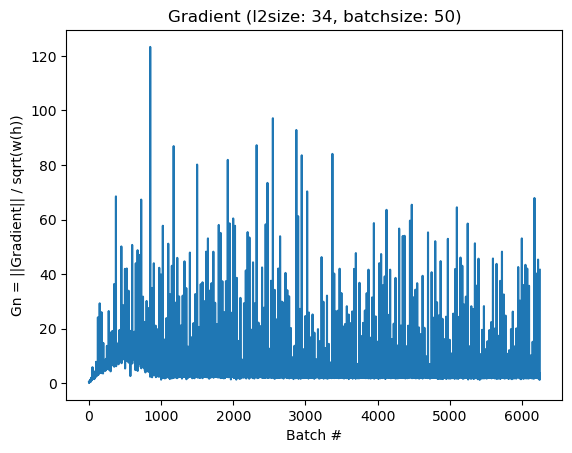

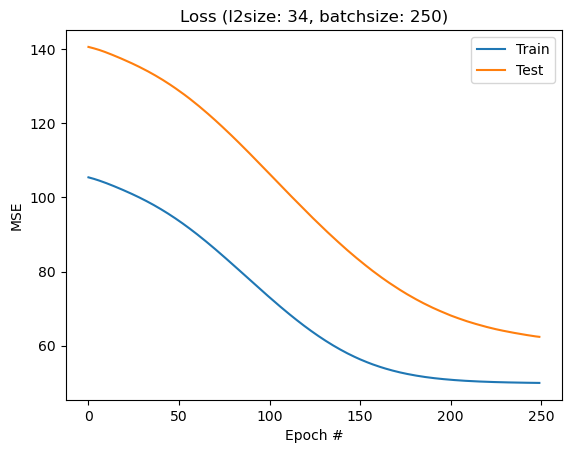

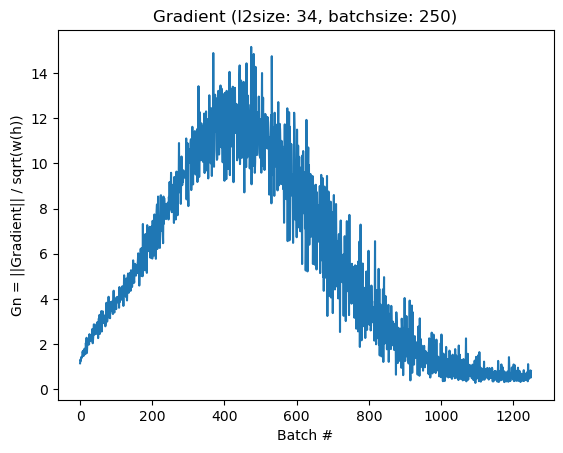

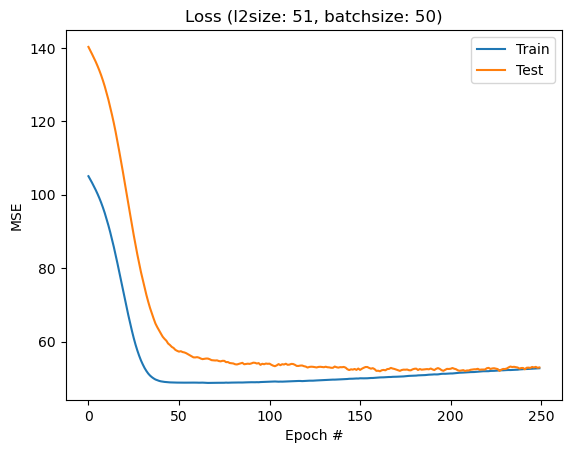

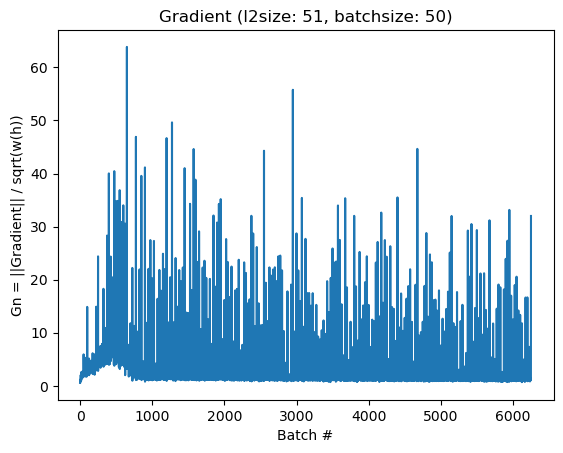

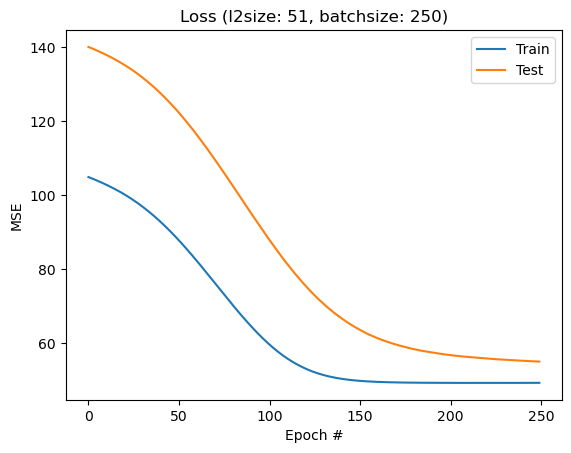

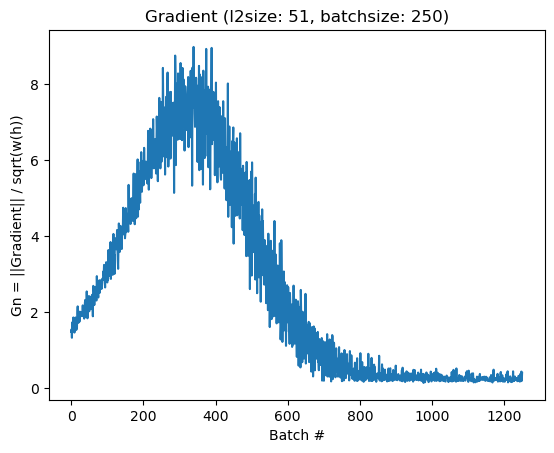

In [6]:
#%%
#--------------------------------MLP TUNING----------------------------------#

#PREPARING MLP1
train_dataset1 = tf.data.Dataset.from_tensor_slices((x_train1, y_train1))
test_dataset1 = tf.data.Dataset.from_tensor_slices((x_test1, y_test1))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3

import time


#AUTOMATING MLP CREATION
def compute_loss(model, x, y):
    return model.loss(model.predict(x, verbose= 1), y)

def train_mlp1(l2size, batch_size, epochs):
  runtime = time.time()
  
  ds_train = train_dataset1.shuffle(1000).batch(batch_size)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
    tf.keras.layers.Dense(1, activation='relu', name='l3')
  ])

  model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))

  train_losses = list()
  test_losses = list()
  mse_grads = list()
  least_loss = np.inf
  k_star = None

  for epoch in range(epochs):
    batch_losses = list()
    for x, y in ds_train:
      with tf.GradientTape() as tape:
        y_hat = model(x, training=True)
        batch_loss = model.loss(y, y_hat)
      gradients = tape.gradient(batch_loss, model.trainable_variables)
      model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      batch_losses.append(batch_loss.numpy())

      all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
      mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
      mse_grads.append(mse_grad)

    epoch_train_loss = compute_loss(model, x_train1, y_train1)
    train_losses.append(epoch_train_loss)

    epoch_test_loss = compute_loss(model, x_test1, y_test1)
    test_losses.append(epoch_test_loss)

    if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
      k_star = epoch
      least_loss = epoch_test_loss



  runtime = time.time() - runtime

  train_mse = np.sqrt(train_losses)
  test_mse = np.sqrt(test_losses)

  return runtime, train_mse, test_mse, mse_grads, k_star


from itertools import product
from collections import defaultdict

hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250

data1 = defaultdict(lambda: list())

for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp1(h, m, epochs)

    data1['l2size'].append(h)
    data1['batch'].append(m)
    data1['epoch'].append(epochs)
    data1['runtime'].append(runtime)
    data1['k*'].append(k_star)
    data1['train_mse*'].append(train_mse[k_star])
    data1['test_mse*'].append(test_mse[k_star])


    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")
    


summary_table1 = pd.DataFrame(data1)


In [7]:
summary_table1

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,142.658880,228,50.302426,50.326502
1,17,250,250,61.176574,249,55.809238,81.208558
2,34,50,250,145.448271,214,50.884360,53.269610
3,34,250,250,65.501973,249,49.924642,62.364090
4,51,50,250,150.213040,161,50.215335,51.891570
5,51,250,250,67.645844,249,49.343841,55.085563


Epoch 1/250
25/25 [==============================] - 1s 7ms/step - loss: 11129.8369 - val_loss: 19693.0508
Epoch 2/250
25/25 [==============================] - 0s 3ms/step - loss: 10973.7549 - val_loss: 19461.5898
Epoch 3/250
25/25 [==============================] - 0s 2ms/step - loss: 10788.5938 - val_loss: 19196.2129
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 10589.2852 - val_loss: 18913.8418
Epoch 5/250
25/25 [==============================] - 0s 2ms/step - loss: 10381.3301 - val_loss: 18616.9512
Epoch 6/250
25/25 [==============================] - 0s 2ms/step - loss: 10154.7520 - val_loss: 18300.9883
Epoch 7/250
25/25 [==============================] - 0s 2ms/step - loss: 9917.6172 - val_loss: 17954.4043
Epoch 8/250
25/25 [==============================] - 0s 2ms/step - loss: 9659.2471 - val_loss: 17581.6738
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 9376.3809 - val_loss: 17174.0957
Epoch 10/250
25/25 [====================

(60,)

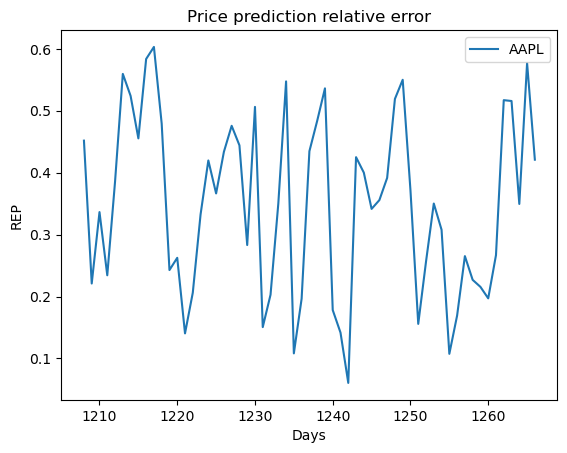

In [5]:
#%%
#-----------------------------------MLP1-------------------------------------#

mlp1 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(51, activation='relu', name='l2'),
  tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp1.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
history1 = mlp1.fit(x_train1, y_train1, epochs=250,batch_size= 50,
    validation_data = (x_test1, y_test1), verbose=1)

Zt1 = mlp1.predict(x_test1, verbose=0)
Zt1 = Zt1.flatten()
Rep1 = np.abs(Zt1-y_test1)/y_test1


plt.figure()
plt.plot(Rep1.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[0]]);

Zt1.shape
y_test1.shape



C:\Users\johnn\AppData\Local\Temp\ipykernel_12464\3040038002.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V2.cor = np.corrcoef(V2)
C:\Users\johnn\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 23), 1267)

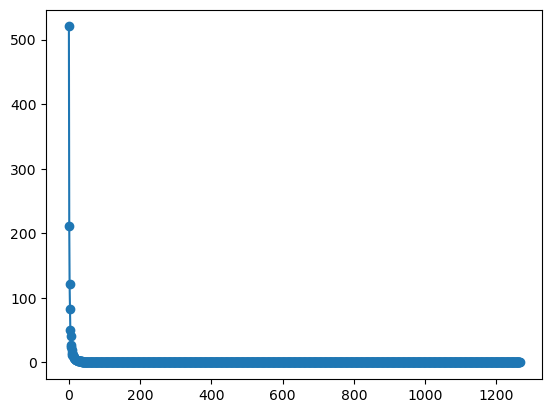

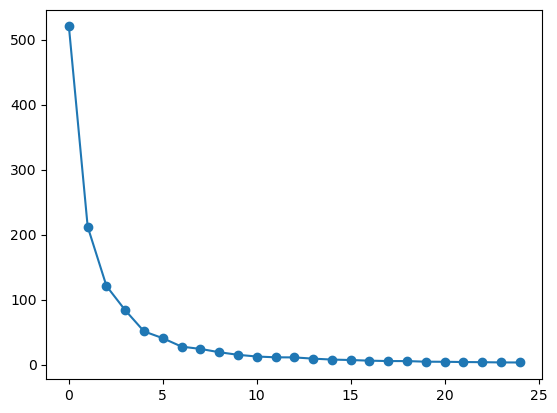

In [23]:
#%%
##############################################################################
#====================================MLP2====================================#
##############################################################################

#------------------------------------PCA-------------------------------------#

V2 = A2.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V2.shape
V2.cor = np.corrcoef(V2)
eigenvalues = np.linalg.eig(V2.cor)
plt.plot(eigenvalues[0],'-o')

plt.figure()
plt.plot(eigenvalues[0][:25],'-o')

pca2 = PCA(n_components=0.95)
U2=pca2.fit_transform(V2)
U2.shape

y2 = B2
y2.shape, U2.shape

N2 = y2.shape[0]
V2.shape, y2.shape, U2.shape, N2



In [7]:
#%%
#---------------------------------MLP SETUP----------------------------------#

x_train2 = list()

for i in range(N2-63):
  vector12 = [U2[i], U2[i+1], U2[i+2]]
  vector12 = np.array(vector12).flatten()
  x_train2.append(vector12)

x_train2 = np.array(x_train2)
x_train2.shape

x_test2 = list()

for i in range(N2-63,N2-3):
  vector12 = [U2[i], U2[i+1], U2[i+2]]
  vector12 = np.array(vector12).flatten()
  x_test2.append(vector12)

x_test2 = np.array(x_test2)
x_test2.shape

y_train2 = y2[3:N2-60]
y_train2.shape

y_test2 = y2[N2-60:]
y_test2.shape

from sklearn.preprocessing import StandardScaler

xscaler = StandardScaler()
x_train2 = xscaler.fit_transform(x_train2)
x_test2 = xscaler.transform(x_test2)



#Finding Hidden Layer Sizes (69 inputs, 1 output)
w = lambda h: 69*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
  h += 1

h



C:\Users\johnn\AppData\Local\Temp\ipykernel_12464\108726913.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train2 = y2[3:N2-60]
C:\Users\johnn\AppData\Local\Temp\ipykernel_12464\108726913.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test2 = y2[N2-60:]


17

2/2 [==============================] - 0s 0s/step


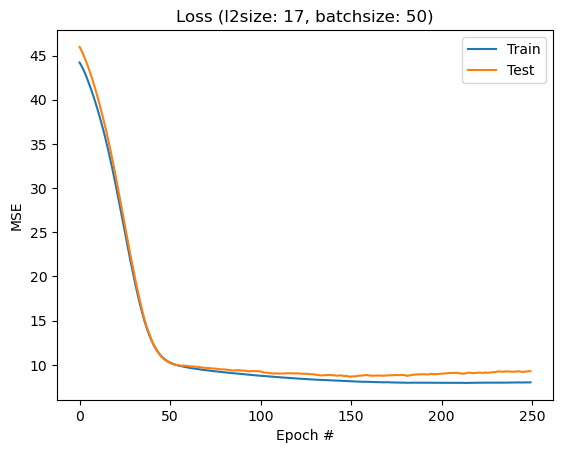

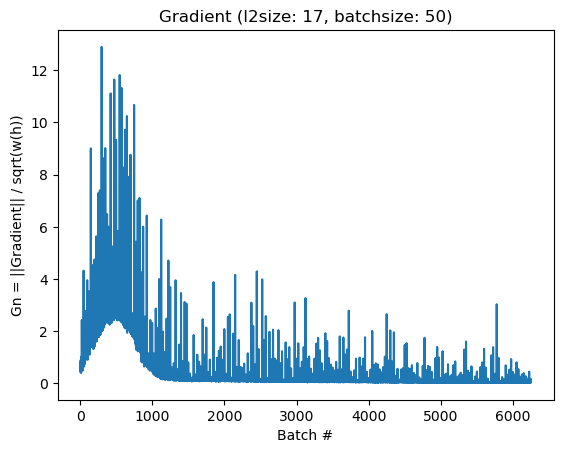

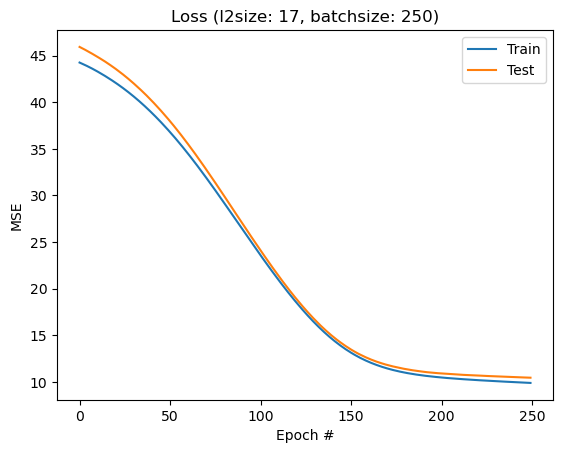

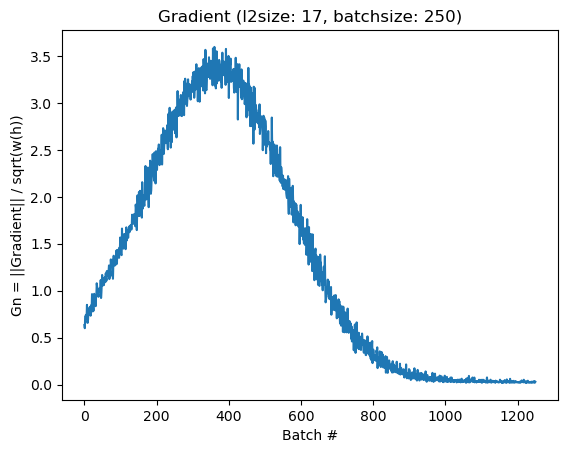

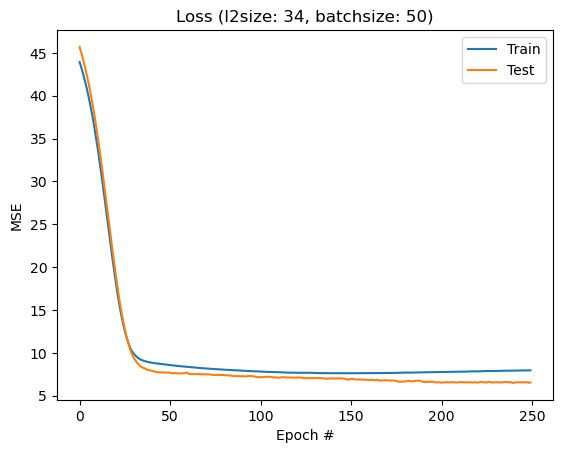

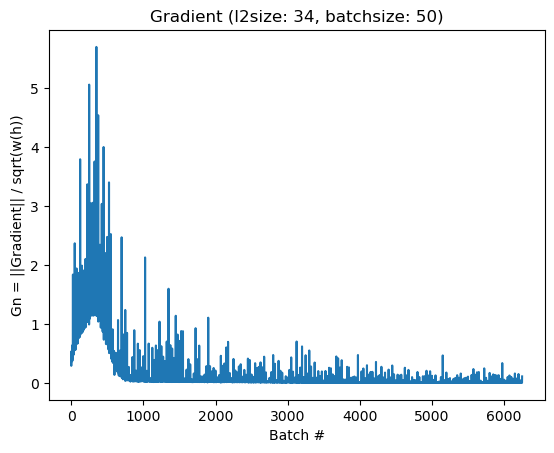

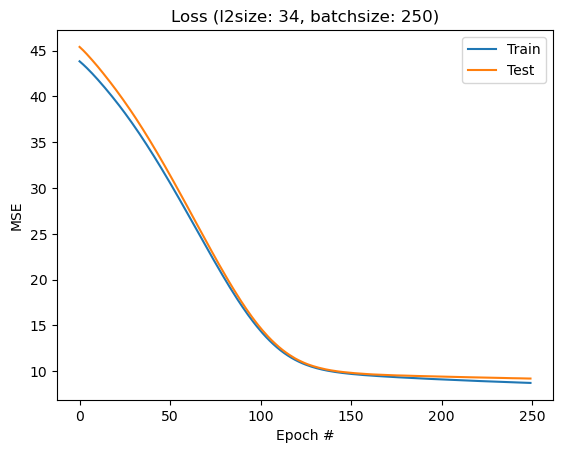

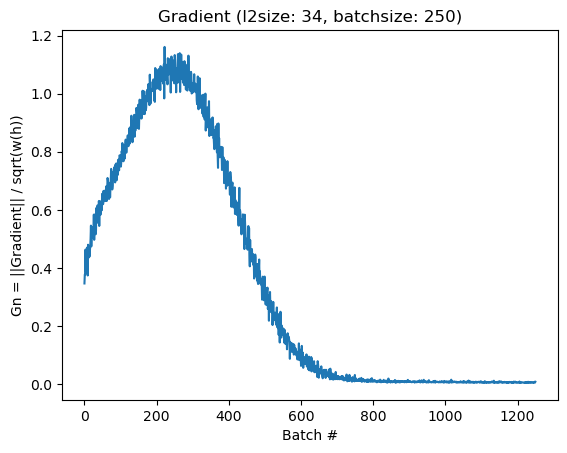

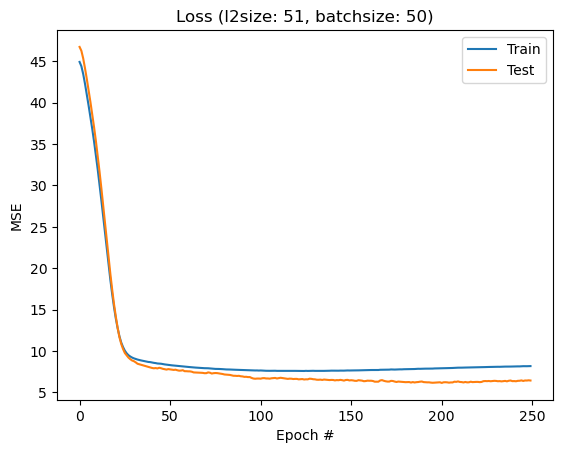

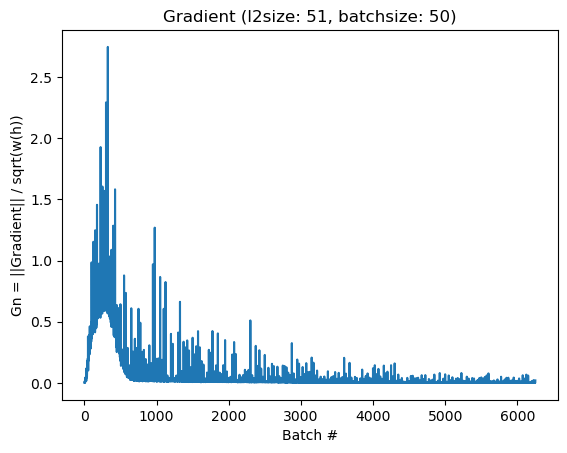

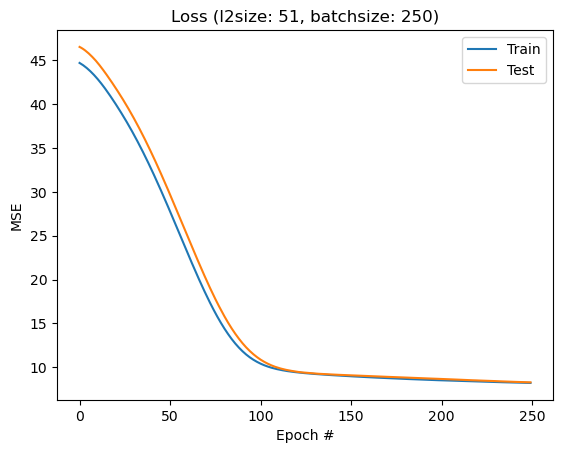

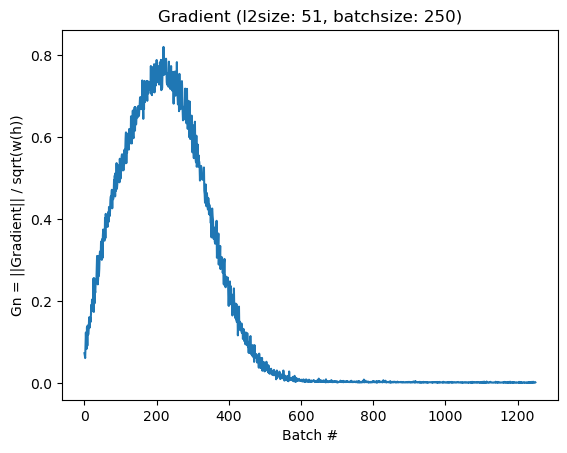

In [8]:
#%%
#--------------------------------MLP TUNING----------------------------------#

#PREPARING MLP2
train_dataset2 = tf.data.Dataset.from_tensor_slices((x_train2, y_train2))
test_dataset2 = tf.data.Dataset.from_tensor_slices((x_test2, y_test2))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3


#AUTOMATING MLP CREATION

def train_mlp2(l2size, batch_size, epochs = 250):
  runtime = time.time()
  
  ds_train = train_dataset2.shuffle(1000).batch(batch_size)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
    tf.keras.layers.Dense(1, activation='relu', name='l3')
  ])

  model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))

  train_losses = list()
  test_losses = list()
  mse_grads = list()
  least_loss = np.inf
  k_star = None

  for epoch in range(epochs):
    batch_losses = list()
    for x, y in ds_train:
      with tf.GradientTape() as tape:
        y_hat = model(x, training=True)
        batch_loss = model.loss(y, y_hat)
      gradients = tape.gradient(batch_loss, model.trainable_variables)
      model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      batch_losses.append(batch_loss.numpy())

      all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
      mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
      mse_grads.append(mse_grad)

    epoch_train_loss = compute_loss(model, x_train2, y_train2)
    train_losses.append(epoch_train_loss)

    epoch_test_loss = compute_loss(model, x_test2, y_test2)
    test_losses.append(epoch_test_loss)

    if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
      k_star = epoch
      least_loss = epoch_test_loss



  runtime = time.time() - runtime

  train_mse = np.sqrt(train_losses)
  test_mse = np.sqrt(test_losses)

  return runtime, train_mse, test_mse, mse_grads, k_star


from itertools import product
from collections import defaultdict

hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250

data2 = defaultdict(lambda: list())

for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp2(h, m, epochs)

    data2['l2size'].append(h)
    data2['batch'].append(m)
    data2['epoch'].append(epochs)
    data2['runtime'].append(runtime)
    data2['k*'].append(k_star)
    data2['train_mse*'].append(train_mse[k_star])
    data2['test_mse*'].append(test_mse[k_star])

    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")

summary_table2 = pd.DataFrame(data2)



In [16]:
summary_table2

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,120.333883,149,8.140045,8.640101
1,17,250,250,58.987008,249,9.891540,10.451522
2,34,50,250,122.675983,26,11.763303,11.816543
3,34,250,250,78.441625,249,8.709576,9.187950
4,51,50,250,149.597130,21,12.779156,12.843840
5,51,250,250,66.832630,249,8.201223,8.269141


Epoch 1/250
5/5 [==============================] - 1s 31ms/step - loss: 1979.0717 - val_loss: 2126.7944
Epoch 2/250
5/5 [==============================] - 0s 11ms/step - loss: 1963.4434 - val_loss: 2109.2124
Epoch 3/250
5/5 [==============================] - 0s 8ms/step - loss: 1947.1173 - val_loss: 2090.4556
Epoch 4/250
5/5 [==============================] - 0s 12ms/step - loss: 1929.8121 - val_loss: 2071.0525
Epoch 5/250
5/5 [==============================] - 0s 8ms/step - loss: 1911.4553 - val_loss: 2051.0449
Epoch 6/250
5/5 [==============================] - 0s 8ms/step - loss: 1892.4434 - val_loss: 2029.7183
Epoch 7/250
5/5 [==============================] - 0s 12ms/step - loss: 1872.3220 - val_loss: 2007.0081
Epoch 8/250
5/5 [==============================] - 0s 8ms/step - loss: 1851.5054 - val_loss: 1983.5341
Epoch 9/250
5/5 [==============================] - 0s 9ms/step - loss: 1829.9929 - val_loss: 1959.0424
Epoch 10/250
5/5 [==============================] - 0s 8ms/step - los

(60,)

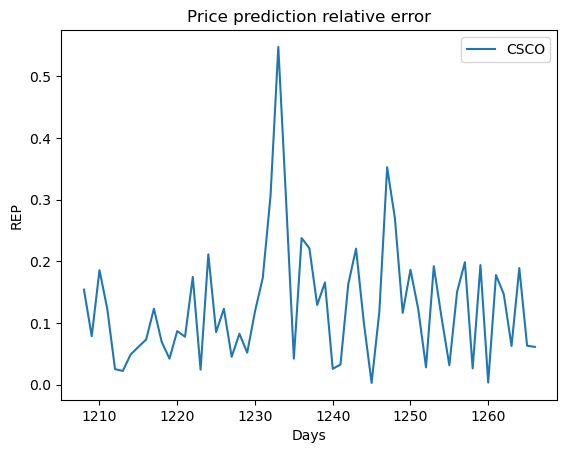

In [9]:
#%%
#-----------------------------------MLP2-------------------------------------#

mlp2 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(51, activation='relu', name='l2'),
  tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp2.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
history2 = mlp2.fit(x_train2, y_train2, epochs=250,batch_size= 250,
    validation_data = (x_test2, y_test2), verbose=1)

Zt2 = mlp2.predict(x_test2, verbose=0)
Zt2 = Zt2.flatten()
Rep2 = np.abs(Zt2-y_test2)/y_test2


plt.figure()
plt.plot(Rep2.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[1]]);

Zt2.shape
y_test2.shape



C:\Users\johnn\AppData\Local\Temp\ipykernel_10052\1595761281.py:10: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  V3.cor = np.corrcoef(V3)
C:\Users\johnn\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1369: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


((1267, 78), (1267,), (1267, 24), 1267)

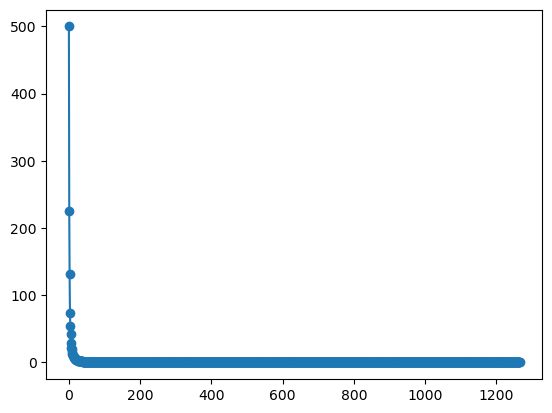

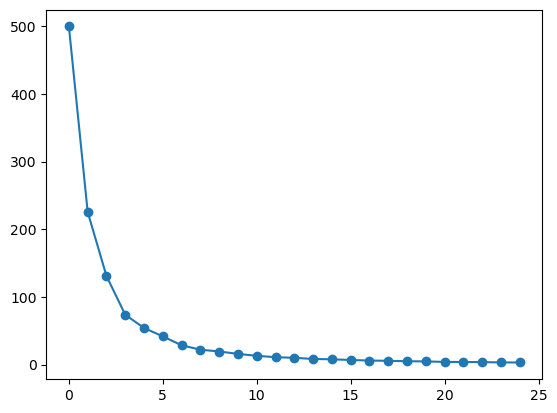

In [2]:
#%%
##############################################################################
#====================================MLP3====================================#
##############################################################################

#------------------------------------PCA-------------------------------------#

V3 = A3.apply(lambda x: (x-x.mean())/ x.std(), axis=1)
V3.shape
V3.cor = np.corrcoef(V3)
eigenvalues = np.linalg.eig(V3.cor)
plt.plot(eigenvalues[0],'-o')

plt.figure()
plt.plot(eigenvalues[0][:25],'-o')

pca3 = PCA(n_components=0.95)
U3=pca3.fit_transform(V3)
U3.shape

y3 = B3
y3.shape, U3.shape

N3 = y3.shape[0]
V3.shape, y3.shape, U3.shape, N3



In [11]:
#%%
#---------------------------------MLP SETUP----------------------------------#

x_train3 = list()

for i in range(N3-63):
  vector12 = [U3[i], U3[i+1], U3[i+2]]
  vector12 = np.array(vector12).flatten()
  x_train3.append(vector12)

x_train3 = np.array(x_train3)
x_train3.shape

x_test3 = list()

for i in range(N3-63,N3-3):
  vector12 = [U3[i], U3[i+1], U3[i+2]]
  vector12 = np.array(vector12).flatten()
  x_test3.append(vector12)

x_test3 = np.array(x_test3)
x_test3.shape

y_train3 = y3[3:N3-60]
y_train3.shape

y_test3 = y3[N3-60:]
y_test3.shape

from sklearn.preprocessing import StandardScaler

xscaler = StandardScaler()
x_train3 = xscaler.fit_transform(x_train3)
x_test3 = xscaler.transform(x_test3)



#Finding Hidden Layer Sizes (72 inputs, 1 output)
w = lambda h: 72*h + h + h*1 + 1
information_number = y_train1.size

h=0
while w(h) < information_number:
  h += 1

h



C:\Users\johnn\AppData\Local\Temp\ipykernel_12464\2171291446.py:24: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train3 = y3[3:N3-60]
C:\Users\johnn\AppData\Local\Temp\ipykernel_12464\2171291446.py:27: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test3 = y3[N3-60:]


17

2/2 [==============================] - 0s 16ms/step


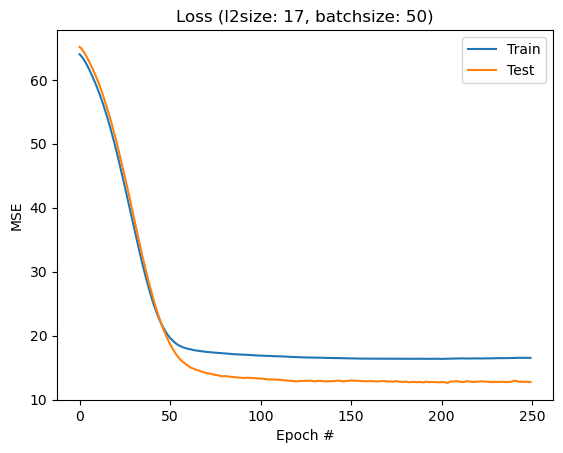

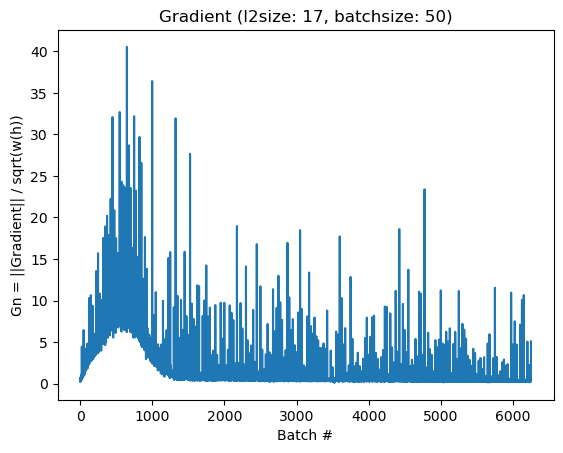

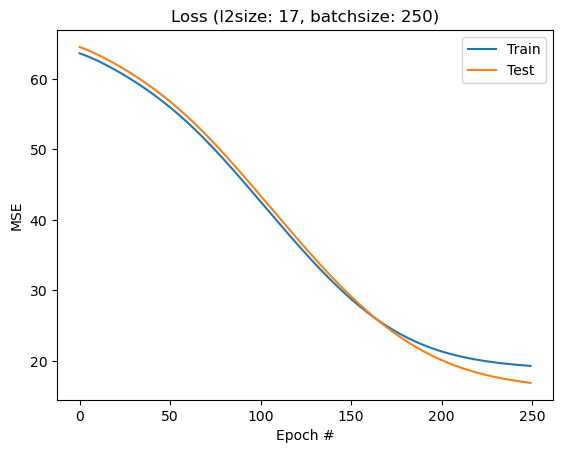

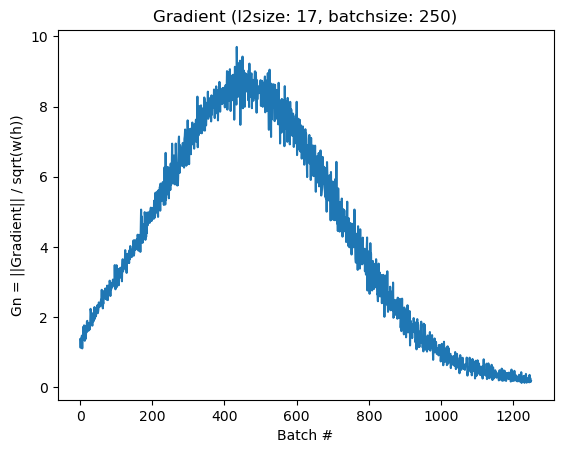

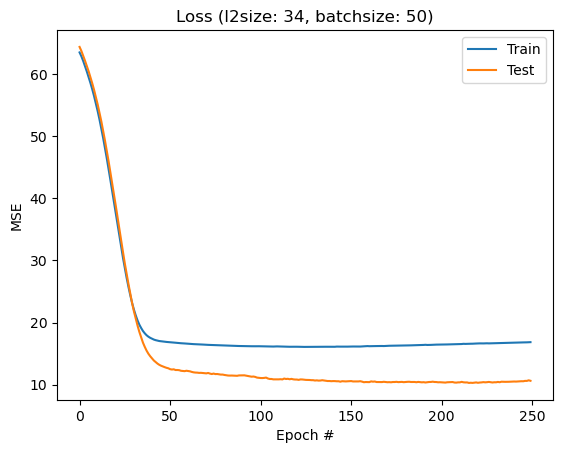

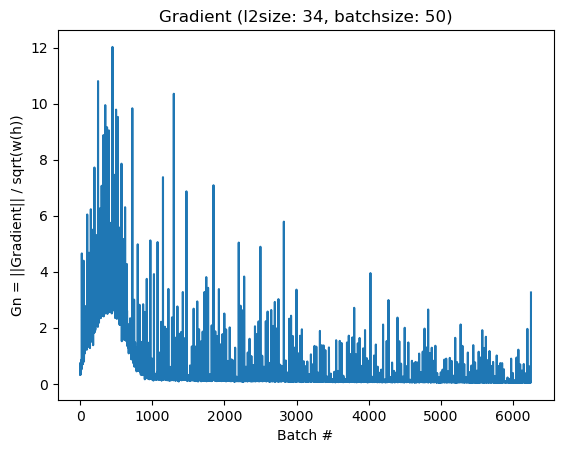

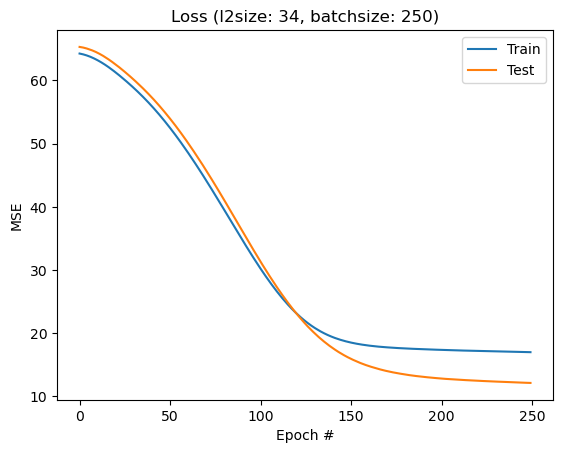

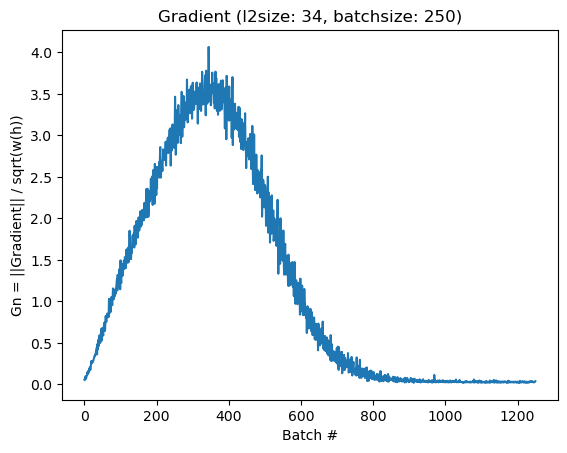

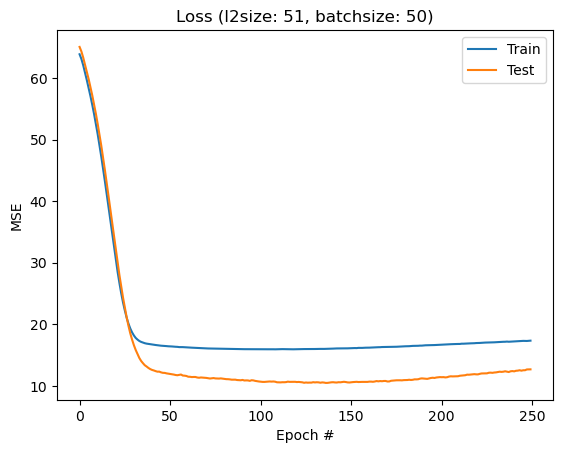

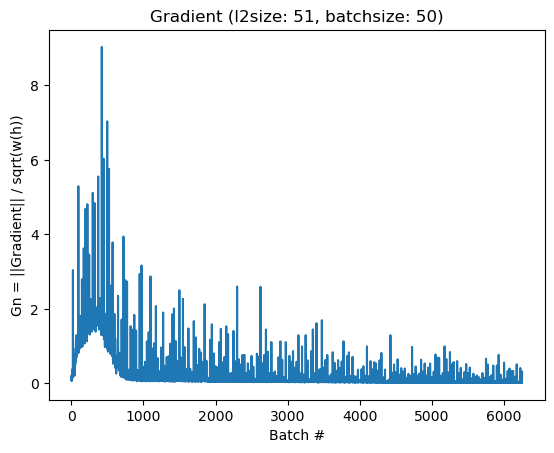

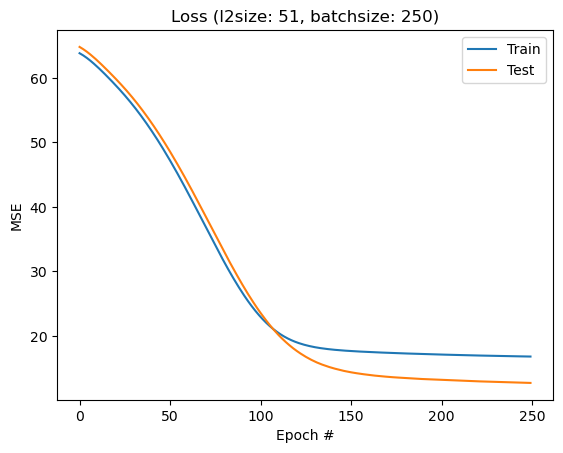

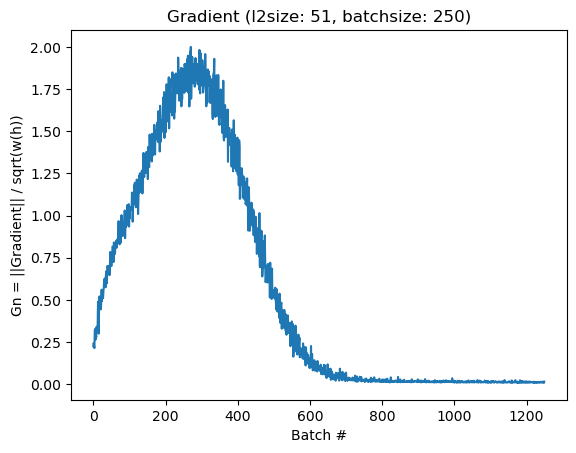

In [12]:
#%%
#--------------------------------MLP TUNING----------------------------------#


#PREPARING MLP3
train_dataset3 = tf.data.Dataset.from_tensor_slices((x_train3, y_train3))
test_dataset3 = tf.data.Dataset.from_tensor_slices((x_test3, y_test3))

h1 = h
h2 = 2*h1
h3 = 3*h1
lr = 1e-3


#AUTOMATING MLP CREATION

def train_mlp3(l2size, batch_size, epochs = 250):
  runtime = time.time()
  
  ds_train = train_dataset3.shuffle(1000).batch(batch_size)

  model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(l2size, activation='relu', name='l2'),
    tf.keras.layers.Dense(1, activation='relu', name='l3')
  ])

  model.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))

  train_losses = list()
  test_losses = list()
  mse_grads = list()
  least_loss = np.inf
  k_star = None

  for epoch in range(epochs):
    batch_losses = list()
    for x, y in ds_train:
      with tf.GradientTape() as tape:
        y_hat = model(x, training=True)
        batch_loss = model.loss(y, y_hat)
      gradients = tape.gradient(batch_loss, model.trainable_variables)
      model.optimizer.apply_gradients(zip(gradients, model.trainable_variables))

      batch_losses.append(batch_loss.numpy())

      all_gradients = np.concatenate([grad.numpy().flatten() for grad in gradients])
      mse_grad = np.mean(all_gradients**2) / np.sqrt(len(all_gradients))
      mse_grads.append(mse_grad)

    epoch_train_loss = compute_loss(model, x_train3, y_train3)
    train_losses.append(epoch_train_loss)

    epoch_test_loss = compute_loss(model, x_test3, y_test3)
    test_losses.append(epoch_test_loss)

    if epoch_test_loss < least_loss and epoch_train_loss < epoch_test_loss:
      k_star = epoch
      least_loss = epoch_test_loss



  runtime = time.time() - runtime

  train_mse = np.sqrt(train_losses)
  test_mse = np.sqrt(test_losses)

  return runtime, train_mse, test_mse, mse_grads, k_star


from itertools import product
from collections import defaultdict

hi = (h1, h2, h3)
batch_sizes = (50, 250)
epochs = 250

data3 = defaultdict(lambda: list())

for h, m in product(hi, batch_sizes):
    runtime, train_mse, test_mse, mse_grads, k_star = train_mlp3(h, m, epochs)

    data3['l2size'].append(h)
    data3['batch'].append(m)
    data3['epoch'].append(epochs)
    data3['runtime'].append(runtime)
    data3['k*'].append(k_star)
    data3['train_mse*'].append(train_mse[k_star])
    data3['test_mse*'].append(test_mse[k_star])

    plt.figure()
    plt.plot(train_mse)
    plt.plot(test_mse)
    plt.legend("Train Test".split())
    plt.title(f"Loss (l2size: {h}, batchsize: {m})")
    plt.xlabel("Epoch #")
    plt.ylabel("MSE")

    plt.figure()
    plt.plot(mse_grads)
    plt.title(f"Gradient (l2size: {h}, batchsize: {m})")
    plt.xlabel("Batch #")
    plt.ylabel("Gn = ||Gradient|| / sqrt(w(h))")

summary_table3 = pd.DataFrame(data3)



In [17]:
summary_table3

,l2size,batch,epoch,runtime,k*,train_mse*,test_mse*
0,17,50,250,125.920161,45,21.939975,21.947777
1,17,250,250,73.673470,163,26.092133,26.120235
2,34,50,250,129.341128,28,24.401164,24.656924
3,34,250,250,61.853539,119,23.355625,23.385894
4,51,50,250,125.899458,26,21.087267,21.157096
5,51,250,250,65.371732,106,21.290985,21.364708


Epoch 1/250
25/25 [==============================] - 1s 6ms/step - loss: 4088.6960 - val_loss: 4189.2979
Epoch 2/250
25/25 [==============================] - 0s 2ms/step - loss: 4022.8713 - val_loss: 4116.1709
Epoch 3/250
25/25 [==============================] - 0s 3ms/step - loss: 3939.6848 - val_loss: 4025.9656
Epoch 4/250
25/25 [==============================] - 0s 3ms/step - loss: 3844.8494 - val_loss: 3926.9749
Epoch 5/250
25/25 [==============================] - 0s 3ms/step - loss: 3744.1594 - val_loss: 3820.9275
Epoch 6/250
25/25 [==============================] - 0s 3ms/step - loss: 3636.9905 - val_loss: 3710.8367
Epoch 7/250
25/25 [==============================] - 0s 3ms/step - loss: 3522.9888 - val_loss: 3591.5190
Epoch 8/250
25/25 [==============================] - 0s 3ms/step - loss: 3401.0676 - val_loss: 3464.0386
Epoch 9/250
25/25 [==============================] - 0s 3ms/step - loss: 3269.9402 - val_loss: 3330.2888
Epoch 10/250
25/25 [==============================] - 0

(60,)

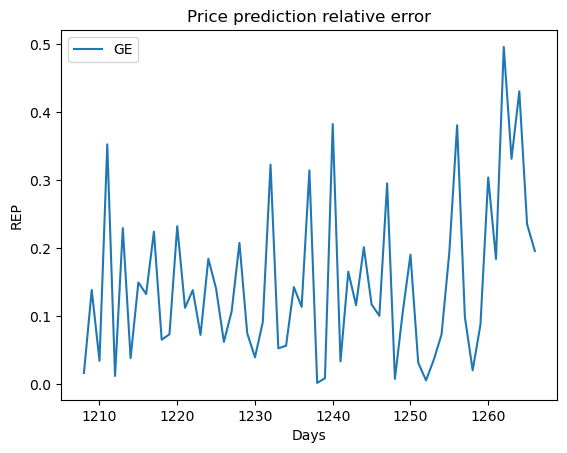

In [13]:
#%%
#-----------------------------------MLP3-------------------------------------#

mlp3 = tf.keras.models.Sequential([
  tf.keras.layers.Dense(34, activation='relu', name='l2'),
  tf.keras.layers.Dense(1, activation='relu', name='l3')
])

mlp3.compile(optimizer='adam', loss=tf.keras.losses.MeanSquaredError(name='mse'))
history3 = mlp3.fit(x_train3, y_train3, epochs=250,batch_size= 50,
    validation_data = (x_test3, y_test3), verbose=1)

Zt3 = mlp3.predict(x_test3, verbose=0)
Zt3 = Zt3.flatten()
Rep3 = np.abs(Zt3-y_test3)/y_test3


plt.figure()
plt.plot(Rep3.iloc[:-1])
plt.title("Price prediction relative error")
plt.xlabel("Days")
plt.ylabel("REP")
plt.legend([stock_names[2]]);

Zt3.shape
y_test3.shape

